<strong> <font size="5"> Exploratory Data Analysis <strong>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_03\data\train.csv', parse_dates=[0])
test = pd.read_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_03\data\test.csv', parse_dates=[0])

In [7]:
train.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [61]:
test.info

<bound method DataFrame.info of                 datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1    2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2    2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3    2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4    2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
...                  ...     ...      ...         ...      ...    ...     ...   
6488 2012-12-31 19:00:00       1        0           1        2  10.66  12.880   
6489 2012-12-31 20:00:00       1        0           1        2  10.66  12.880   
6490 2012-12-31 21:00:00       1        0           1        1  10.66  12.880   
6491 2012-12-31 22:00:00       1        0           1        1  10.66  13.635   
6492 2012-12-31 23:00:00       1        0           1        1  10.66  13.635

In [62]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [21]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [64]:
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

<AxesSubplot:xlabel='count'>

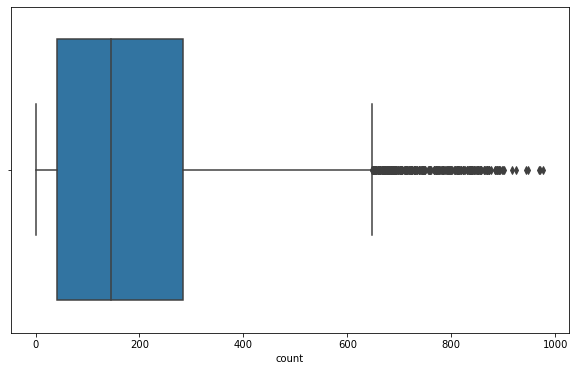

In [65]:
sns.boxplot(x=train['count'])

In [66]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64


In [67]:
plt.figure(figsize=(20,10))
c=train.corr()
c

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Figure size 1440x720 with 0 Axes>

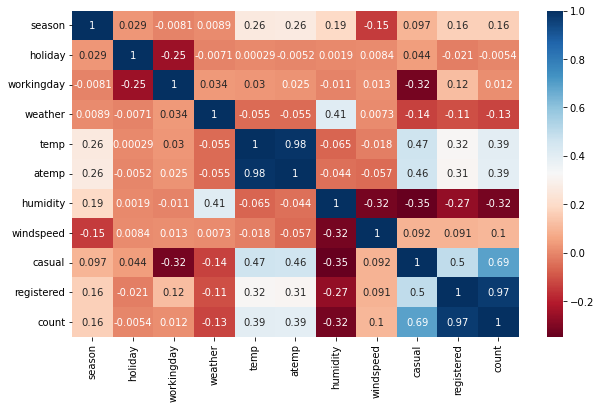

In [68]:
sns.heatmap( c, annot=True, cmap='RdBu');

<AxesSubplot:xlabel='windspeed'>

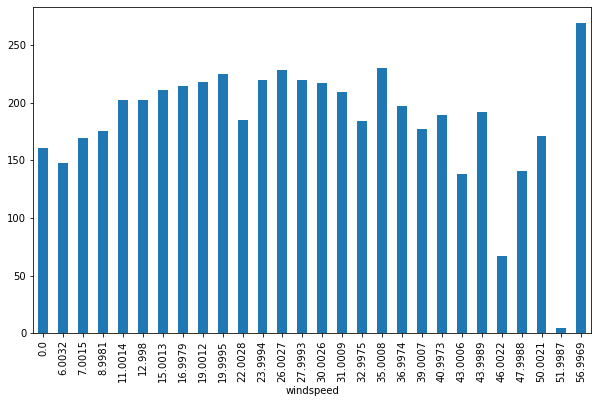

In [69]:
train.groupby(train.windspeed)['count'].mean().plot(kind='bar')

In [71]:
'Corr. with windspeed:', train.corr()['windspeed'].sort_values()

('Corr. with windspeed:',
 humidity     -0.318607
 season       -0.147121
 atemp        -0.057473
 temp         -0.017852
 weather       0.007261
 holiday       0.008409
 workingday    0.013373
 registered    0.091052
 casual        0.092276
 count         0.101369
 windspeed     1.000000
 Name: windspeed, dtype: float64)

<AxesSubplot:xlabel='humidity', ylabel='count'>

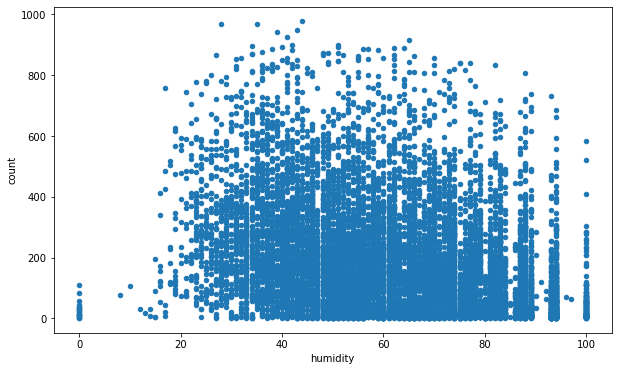

In [97]:
train.plot(x="humidity", y="count", kind="scatter")

<strong> <font size="5"> Feature Engineering, Regression Model, Model Regularization and RMSLE <strong>

In [72]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3)
rf

RandomForestClassifier(max_depth=3, n_estimators=20)

In [73]:
def create_date_features(df):
    x = df['datetime']
    return pd.DataFrame({
        'month': x.dt.month,
        'hour': x.dt.hour,
        'week': x.dt.isocalendar().week,
        'weekday': x.dt.weekday
    })

In [74]:
datetime_pipeline = make_pipeline(
    FunctionTransformer(create_date_features, validate=False),
    OneHotEncoder(handle_unknown='ignore')
)

In [75]:
transformer = make_column_transformer(
    (datetime_pipeline, ['datetime']),
    (StandardScaler(), ['temp', 'atemp', 'humidity', 'windspeed']),         
    (OneHotEncoder(handle_unknown='ignore'), ['season', 'weather']),
    ('passthrough', ['workingday', 'holiday'])
)

In [76]:
model_pipeline = make_pipeline(
    transformer, 
    PolynomialFeatures(include_bias=False), 
    PoissonRegressor(max_iter=1000)
)

In [77]:
model_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'polynomialfeatures', 'poissonregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__pipeline', 'columntransformer__standardscaler', 'columntransformer__onehotencoder', 'columntransformer__passthrough', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__functiontransformer', 'columntransformer__pipeline__onehotencoder', 'columntransformer__pipeline__functiontransformer__accept_sparse', 'columntransformer__pipeline__functiontransformer__check_inverse', 'columntransformer__pipeline__functiontransformer__func', 'columntransformer__pipeline__functiontransformer__inv_kw_args', 'columntransformer__pipeline__f

In [78]:
param_grid = {
    'polynomialfeatures__degree': [1, 2], 
    'poissonregressor__alpha': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40]
}

In [79]:
X_train = train.drop(['casual','registered', 'count'], axis=1)
y_train = train['count']

In [55]:
def rmsle(y, y_pred):   
    
    # set negative to zero
    y_pred[y_pred < 0] = 0
        
    return np.sqrt(metrics.mean_squared_log_error(y, y_pred))

neg_rmsle_score = metrics.make_scorer(rmsle, greater_is_better=False)

In [ ]:
cv = GridSearchCV(
    model_pipeline, 
    param_grid, 
    return_train_score=True, 
    scoring=neg_rmsle_score, 
    cv=5, 
    n_jobs=4, 
    verbose=1
)
cv.fit(X_train, y_train)
cv_res = pd.DataFrame(cv.cv_results_)

In [ ]:
cv_res[[
    'param_polynomialfeatures__degree',
    'param_poissonregressor__alpha',
    'mean_train_score', 
    'mean_test_score'
]].abs()

<AxesSubplot:xlabel='param_poissonregressor__alpha'>

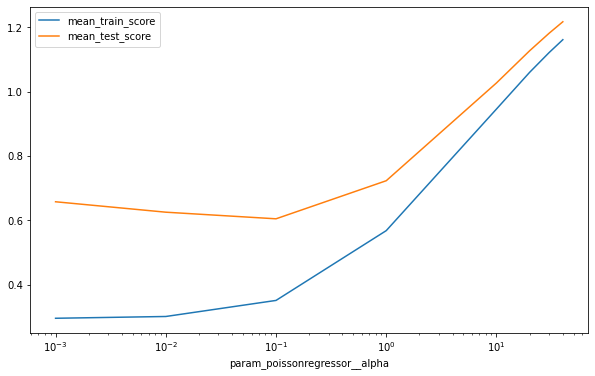

In [84]:
row_filter = cv_res['param_polynomialfeatures__degree'] == 2
cv_res.loc[row_filter, ['param_poissonregressor__alpha', 'mean_train_score', 'mean_test_score']].abs().plot(x='param_poissonregressor__alpha', logx=True)

In [86]:
cv.best_params_

{'poissonregressor__alpha': 0.1, 'polynomialfeatures__degree': 2}

In [87]:
y_pred = cv.best_estimator_.predict(test)
y_pred[y_pred < 0] = 0
assert all(y_pred >= 0)